# ML - Classifier 만들기 (2018)

## - 설명-

* classification model 설계
    * 4가지 이상의 모델, 1가지 이상의 딥러닝 라이브러리 사용한 모델
* Dataset 최대한 분석

## -실험 전체 요약-

이번 실험은 주어진 데이터 셋에 대해서 여러 classification 알고리즘을 통한 모델을 설계해서 실험 내용 중에서 최적의 모델 성능 평가를 하는 것에 초점을 두었다. 추천 데이터 셋 중에서 mushroom data set을 선정하였으며, 아래 실험 과정에 기술한 바와 같이 데이터 셋을 해석하여 Precision을 metric으로 성능을 평가하였다. Cross validation을 여러 모델에 대해서 실험해보았으며, 그 후 전체 데이터를 train, validation, test 용으로 6:2:2의 비율로 나누어 실험에 사용하였다. 총 8가지 classifier 모델로 실험하였으며 초기 계획은 인코딩 후, 여러 모델 구축, feature selection 후 같은 모델에 대한 성능 비교, 그리고 딥러닝 도구 keras를 이용한 MLP 설계 후 sklearn의 MLP와 비교 순서로 진행할 예정이었으나, feature selection 후 인코딩 과정에서 아무리 시간을 투자해도 해결되지 않는 에러가 계속 발생하여, 초기 계획하였던 실험의 outline 코드만 마크다운으로 처리하여 보고서를 작성하였다. 에러가 해결되었다면 좀 더 다각적인 시각에서 비교가 가능했을 것이라는 점이 매우 아쉽지만, 일단 여러 시도를 통헤 8가지의 classifier를 part1에서 구축해보았다는 것과, 끝까지 시도해보았다는 점에 의의를 두며 이 실험을 마감한다.
*더 자세한 요약은 각 파트에서 다룸

## -선정 데이터 설명-

### Mushroom Data Set

    total: 8124 instances
이 데이터는 주름버섯과에 속하는 주름버섯속과 갓버섯속에 해당하는 23가지 종의 주름버섯들 중에서 채취한 8124개의 샘플들이다. 총 22개의 attributes는 버섯 뚜껑의 모양, 색깔, 향기, 주름의 크기 등을 기술하고 있다. 섭취 가능 여부를 definitely edible(확실히 섭취 가능)과 definitely poisonous(확실히 독성), unknown edibility(섭취 가능 여부 모름), not recommended(섭취 추천하지 않음)로 나누어서 edible 그리고 poisonous 이렇게 2개의 class로 나타나있다.

### attribute description
    total: 22 attributes, all categorical
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### class description
    total: 2 classes
1. edible
2. poisonous
    class distribution 
   -edible: 51.8% (4208 instances)
   -poisonous: 48.2% (3916 instances)

### data URL
https://archive.ics.uci.edu/ml/datasets/Mushroom

## 실험 진행 목차

본 레포트는 주어진 data를 통해서 각 버섯 샘플들이 섭취 가능한지 여부를 classify하는 여러 모델들을 설계하는 실험 과정에서의 여러 시도와 이를 통한 모델 개선 과정 및 결론을 포함한다.

### Part 1. 주어진 data를 인코딩 후 다양한 모델 실험 해보기
### Part 2. Feature space size 변경 실험: feature selection
### Part 3. 편집한 feature로 다양한 모델 실험
### Part 4. 딥러닝 도구 keras로 MLP 모델 구축해보기
### Part 5. 실험 정리 및 결론
---

## Part1

### 데이터 준비하기

주어진 data에 인덱스를 추가해 csv 파일로 변환해주었고, 이를 pandas로 불러왔다.

In [407]:
import pandas as pd

In [408]:
data_path = "C:\\Users\\chae\\Downloads\\mushroom.csv"

In [419]:
data = pd.read_csv(data_path)

In [420]:
data.dtypes

Class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

모든 attribute가 다 categorical한 값을 가짐을 알 수 있다.

In [421]:
data.columns

Index(['Class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

첫번째 column은 class를 나머지 column들은 22개의 각 attribute들이다.

In [422]:
data.count()

Class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

### 전처리: missing value 처리

In [423]:
stalk_root_data=data['stalk-root']

In [424]:
stalk_root_data = stalk_root_data.astype('category')

In [425]:
stalk_root_index1 = pd.Index(list(stalk_root_data))

In [426]:
stalk_root_index1

Index(['e', 'c', 'c', 'e', 'e', 'c', 'c', 'c', 'e', 'c',
       ...
       'c', '?', '?', '?', '?', '?', '?', '?', '?', '?'],
      dtype='object', length=8124)

'?'라는 값으로 학습에 방해가 되는 값들이 존재함을 확인하였다.

In [427]:
df=pd.DataFrame(data=stalk_root_index1)

In [428]:
import numpy as np

In [429]:
df = df.replace('?', np.nan)

In [430]:
from sklearn.impute import SimpleImputer

In [431]:
imputer = SimpleImputer(strategy='most_frequent')

In [432]:
df=imputer.fit_transform(df)

In [433]:
df

array([['e'],
       ['c'],
       ['c'],
       ...,
       ['b'],
       ['b'],
       ['b']], dtype=object)

'?'값을 nan으로 대체해준 뒤, imputer를 통해서 빈도수가 가장 높은 값으로 missing value를 채워주었다.

### 인코딩

위의 22개의 attribute와 class value가 모두 categorical하므로 인코딩을 해주었다.

인코딩 기법으로는 onehot encoding을 해주었는데 값의 크기에 따라서 상관관계가 없는 attribute value라고 판단했기 때문이다.

In [435]:
from sklearn.preprocessing import OneHotEncoder

In [436]:
ohe = OneHotEncoder()

In [437]:
data_x = data.drop(columns=['Class'])

In [438]:
ohe.fit(data_x)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [439]:
ohe.categories_

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
 array(['f', 'g', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object),
 array(['a', 'f'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['?', 'b', 'c', 'e', 'r'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['f', 'k', 's', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object),
 array(['p'], dtype=object),
 array(['n', 'o', 'w', 'y'], dtype=object),
 array(['n', 'o', 't'], dtype=object),
 array(['e', 'f', 'l', 'n', 'p'], dtype=object),
 array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=ob

In [440]:
data_onehot = ohe.transform(data_x)

In [441]:
data_onehot = data_onehot.toarray()
data_onehot.shape[1]

117

In [442]:
df = pd.DataFrame(data=data_onehot)

In [443]:
data_onehot=pd.concat((data['Class'],df),axis=1)
data_onehot

,Class,0,1,2,3,4,5,6,7,8,...,107,108,109,110,111,112,113,114,115,116
0,p,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,e,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,p,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,e,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,e,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,p,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,e,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [444]:
data_onehot = data_onehot.values
data_onehot

array([['p', 0.0, 0.0, ..., 0.0, 1.0, 0.0],
       ['e', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['e', 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['e', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['p', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['e', 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

### 데이터 split

원래의 dataset을 train set, validation set, test set으로 60:20:20의 비율로 구분했다.

In [445]:
import random
random.shuffle(data_onehot)

In [446]:
def split_list(a_list,i):
    half = int(len(a_list)*i)
    return a_list[:half],a_list[half:]

In [447]:
train_onehot,temp=split_list(data_onehot,0.6)
valid_onehot,test_onehot=split_list(temp,0.5)
train_onehot

array([['p', 0.0, 0.0, ..., 0.0, 1.0, 0.0],
       ['p', 0.0, 0.0, ..., 0.0, 1.0, 0.0],
       ['p', 0.0, 0.0, ..., 0.0, 1.0, 0.0],
       ...,
       ['e', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['p', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['e', 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [451]:
onehot_x = data_onehot[:,1:116]
onehot_y = data_onehot[:,0]
train_onehot_x = train_onehot[:,1:116]
train_onehot_y = train_onehot[:,0]
valid_onehot_x = valid_onehot[:,1:116]
valid_onehot_y = valid_onehot[:,0]
test_onehot_x = test_onehot[:,1:116]
test_onehot_y = test_onehot[:,0]

그리고는 attribute data와 class data를 각각 x와 y로 split하였다.

### K-Fold
약 8000개의 instance를 가진 이 데이터 셋의 크기가 아주 크지는 않다고 생각이 되어서 Cross Validation을 한번 시도해보고자 k = 10으로 설정해 K-fold 기법을 사용해보았다.  

In [452]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [453]:
kf=KFold(n_splits=10)

#### 여러 모델  알고리즘 실험 시도

(1) Decision Tree

In [454]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()

In [455]:
score=cross_val_score(decision_tree,onehot_x,onehot_y,cv=kf,n_jobs=-1)
score.mean()

1.0

(2) Logistic Regression

In [456]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [457]:
score=cross_val_score(LR,onehot_x,onehot_y,cv=kf,n_jobs=-1)
score.mean()

0.9998768472906404

(3) Perceptron

In [278]:
from sklearn.linear_model import Perceptron
Perceptron = Perceptron()

In [458]:
score=cross_val_score(Perceptron,onehot_x,onehot_y,cv=kf,n_jobs=-1)
score.mean()

0.9997536945812808

(4) MLP (Multi Layered Perceptron)

In [459]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(hidden_layer_sizes=(20,6), max_iter=100, warm_start=True)

In [460]:
score=cross_val_score(MLP_classifier,onehot_x,onehot_y,cv=kf,n_jobs=-1)
score.mean()

0.9998768472906404

(5) KNN (K-Nearest Neighbor)

In [105]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [461]:
score=cross_val_score(KNN,onehot_x,onehot_y,cv=kf,n_jobs=-1)
score.mean()

0.9998768472906404

(6) SVM (Support Vector Machine)

In [462]:
from sklearn import svm
SVM=svm.SVC(kernel='linear')

In [463]:
score=cross_val_score(SVM,onehot_x,onehot_y,cv=kf,n_jobs=-1)
score.mean()

0.9998768472906404

(7) Ensemble

    (7)-a. Bagging Classifier (Bootstrap aggregating)
    * Decision Tree를 estimator(committee 모델)로 이용했다.

In [464]:
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(tree.DecisionTreeClassifier())

In [465]:
score=cross_val_score(bagging,onehot_x,onehot_y,cv=kf,n_jobs=-1)
score.mean()

1.0

    (7)-b. Random Forest

In [466]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

In [467]:
score=cross_val_score(random_forest,onehot_x,onehot_y,cv=kf,n_jobs=-1)
score.mean()

1.0

#### Cross Validation 실험 정리

<시도한 모델 알고리즘>
* Decision Tree
* Logistic Regression
* Perceptron
* MLP
* KNN
* SVM with linear kernel
* Bagging Classifier
* Random Forest

<결과 정리>

| Model Algs | Decision Tree | Logistic Regression | Perceptron | Multi Layered Perceptron | K-Nearest Neighbor | Support Vector Machine | Bagging | Random Forest |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| Cross Validation | 1.0 | 0.9998768472906404 | 0.9997536945812808 | 0.9998768472906404 | 0.9998768472906404 | 0.9998768472906404 | 1.0 | 1.0 |

이 데이터 셋의 결과가 알고리즘에 따라 의미있는 차이를 보여주지는 않지만,
    * DT
    * Bagging
    * Random Forest
위의 4개의 알고리즘은 결과값이 1.0으로 나올 수 있는 최대치의 결과를 보여주고 있다.

### 모델에 적용해보기

* 성능 평가 기준은 "Precision"으로 정하였다. 왜냐하면 Class value인 edible이 positive일 때, 실제 독이 들어 있지 않아 먹을 수 있다고 예측한 것 중에 실제로 먹을 수 있는 버섯을 잘 판단해 내는 것이 이 데이터 셋에서 중요하다고 판단했기 떄문이다.
* positive = edible
* precision = positive predicted value = tp/(tp+fp)

### (1) Decision Tree

    a. 분류 기준을 entropy로 할 때

In [530]:
from sklearn import tree
dt_entropy1 = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)
dt_entropy2 = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50)
dt_entropy3 = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=100)
dt_entropy4 = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=200)

In [531]:
dt_entropy1.fit(train_onehot_x, train_onehot_y)
dt_entropy2.fit(train_onehot_x, train_onehot_y)
dt_entropy3.fit(train_onehot_x, train_onehot_y)
dt_entropy4.fit(train_onehot_x, train_onehot_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=200,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [532]:
from sklearn.metrics import classification_report, confusion_matrix

In [533]:
prediction1 = dt_entropy1.predict(valid_onehot_x)
prediction2 = dt_entropy2.predict(valid_onehot_x)
prediction3 = dt_entropy3.predict(valid_onehot_x)
prediction4 = dt_entropy4.predict(valid_onehot_x)

In [534]:
tn, fp, fn, tp = confusion_matrix(prediction1,valid_onehot_y).ravel()
precision1 = tp/(tp+fp)
tn, fp, fn, tp = confusion_matrix(prediction2,valid_onehot_y).ravel()
precision2 = tp/(tp+fp)
tn, fp, fn, tp = confusion_matrix(prediction3,valid_onehot_y).ravel()
precision3 = tp/(tp+fp)
tn, fp, fn, tp = confusion_matrix(prediction4,valid_onehot_y).ravel()
precision4 = tp/(tp+fp)

In [535]:
precision1

0.9455782312925171

In [536]:
precision2

0.9608843537414966

In [537]:
precision3

0.9455782312925171

In [538]:
precision4

0.9404761904761905

    b. 분류 기준을 gini로 할 때

In [539]:
dt_gini1 = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10)
dt_gini2 = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes=50)
dt_gini3 = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes=100)
dt_gini4 = tree.DecisionTreeClassifier(criterion='gini', max_leaf_nodes=200)

In [540]:
dt_gini1.fit(train_onehot_x, train_onehot_y)
dt_gini2.fit(train_onehot_x, train_onehot_y)
dt_gini3.fit(train_onehot_x, train_onehot_y)
dt_gini4.fit(train_onehot_x, train_onehot_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=200,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [541]:
prediction11 = dt_entropy1.predict(valid_onehot_x)
prediction22 = dt_entropy2.predict(valid_onehot_x)
prediction33 = dt_entropy3.predict(valid_onehot_x)
prediction44 = dt_entropy4.predict(valid_onehot_x)

In [542]:
tn, fp, fn, tp = confusion_matrix(prediction11,valid_onehot_y).ravel()
precision11 = tp/(tp+fp)
tn, fp, fn, tp = confusion_matrix(prediction22,valid_onehot_y).ravel()
precision22 = tp/(tp+fp)
tn, fp, fn, tp = confusion_matrix(prediction33,valid_onehot_y).ravel()
precision33 = tp/(tp+fp)
tn, fp, fn, tp = confusion_matrix(prediction44,valid_onehot_y).ravel()
precision44 = tp/(tp+fp)

In [543]:
precision11

0.9455782312925171

In [544]:
precision22

0.9608843537414966

In [545]:
precision33

0.9455782312925171

In [546]:
precision44

0.9404761904761905

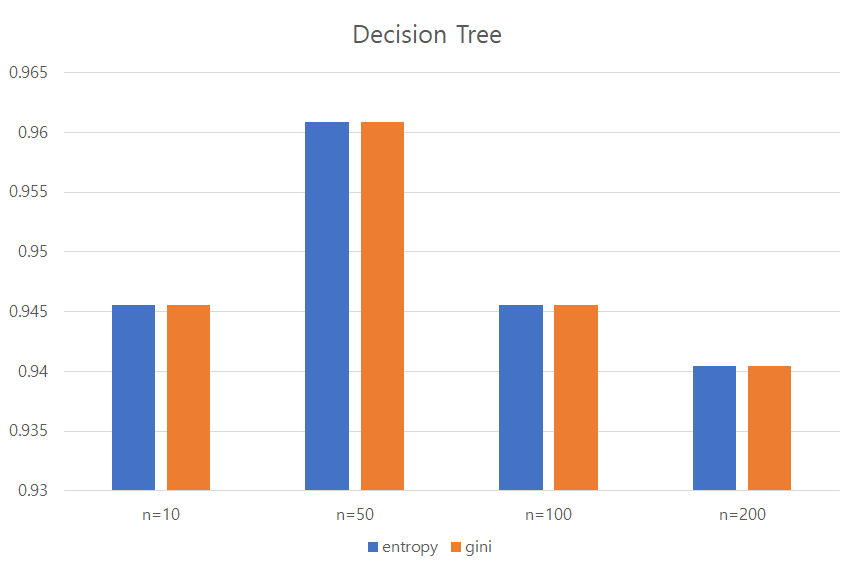

먼저 min_leaf_nodes라는 parameter는 약 8000여개의 instance가 있는 이 데이터 셋에서 10, 50, 100, 200으로 각각 실험해보았을 때, 50일 때 precision 성능이 가장 높은 것으로 나타났는데 실험한 4개의 기준 중 200으로 설정했을 때의 최저값보다 약 2%가량 높게 나타났다.
또 분류 기준 측면에서 entropy와 gini 두가지로 실험해보았을 때, 이 데이터 셋에서는 두 성능이 차이를 보여주지 못하고 있음을 알 수 있다.
따라서 분류 기준을 무엇으로 할 것인가 보다는, pruning을 위한 즉, overfitting을 막기 위한 parameter 설정에 좀 더 큰 중요도를 두고 분석해야함을 알게 되었다. overfiiting의 관점에서 첫번째 기준인 min_leaf_nodes가 10인 것은 training data에 대해서 그 parameter값이 좀 더 클 때보다 overfitting이 되어서 성능이 낮게 나타났음을 생각해볼 수 있고, 또 값이 100이상이 되어 오히려 성능이 떨어지는 것은 학습 시 undefit이 되어 제대로 학습을 하지 못했기 때문이라는 것 역시 고려해볼 수 있다.

위의 실험 결과를 바탕으로, test set을 이용한 최종 성능 평가는 criterion=entropy, min_leaf_nodes=50으로 parameter를 설정한 후 진행하였다.

In [557]:
prediction_dt = dt_entropy2.predict(test_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_dt,test_onehot_y).ravel()
precision_dt = tp/(tp+fp)

In [558]:
precision_dt

0.9629139072847682

예상 밖에도 test 데이터에 대해서 성능이 거의 차이가 없으나 미묘하게 더 개선되었음을 알 수 있다. 이는 test 셋과 training 셋이 아주 비슷한 분포를 띄고 있다고 생각해볼 수 있을 것 같다.

### (2) Logistic Regression

In [559]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [560]:
LR.fit(train_onehot_x, train_onehot_y)

C:\Users\chae\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [561]:
prediction_lr = LR.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_lr,valid_onehot_y).ravel()
precision_lr = tp/(tp+fp)

In [562]:
precision_lr

0.9387755102040817

In [563]:
prediction_lr_t = LR.predict(test_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_lr_t,test_onehot_y).ravel()
precision_lr_t = tp/(tp+fp)

In [564]:
precision_lr_t

0.8887417218543047

| data | validation set | test_set |
|:--------:|:--------:|:--------:|
| precision | 0.9387755102040817 | 0.8887417218543047 |

Logistic Regression을 통해 training 데이터 셋으로 학습하였더니 validation 셋에 대해서는 약 94%의 성능을 보이고 test 셋에 대해서는 약 90%정도의 성능을 보여주는데, 이는 이전에 decision tree의 결과와 비교해서 상당히 유의미한 차이가 있는 모델이라고 볼 수 있다. Decision tree부분에서 언급했듯이, 이 데이터는 분포가 아주 비슷한 데이터들이 몰려있을 수도 있는데, 좀 더 산포된 추가의 데이터가 주어졌을 때, 오히려 이 모델이 좀 더 general하게 잘 분류해낼 수 있을 수도 있을 것 같다는 예측을 해본다. 하지만 이를 직접 실험해보지 못하는 아쉬움이 있다.

### (3) Perceptron

In [565]:
from sklearn.linear_model import Perceptron

In [566]:
P = Perceptron()

In [569]:
P.fit(train_onehot_x, train_onehot_y)

C:\Users\chae\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [570]:
prediction_p = P.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_p,valid_onehot_y).ravel()
precision_p = tp/(tp+fp)

In [572]:
precision_p

0.9608843537414966

In [573]:
prediction_p_t = P.predict(test_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_p_t,test_onehot_y).ravel()
precision_p_t = tp/(tp+fp)

In [574]:
precision_p_t

0.9642384105960264

| data | validation set | test_set |
|:--------:|:--------:|:--------:|
| precision | 0.9608843537414966 | 0.9642384105960264 |

Perceptron의 경우 validation과 test 셋 각각에 대한 성능은 아주 작게 약 0.3%정도 차이가 난다. 여기서도 신기한 것은 미묘하지만 test 셋의 정확도가 조금 더 높다는 것이다.

### (4) Multi Layered Perceptron (MLP)

    a. activation fuction: sigmoid

In [710]:
from sklearn.neural_network import MLPClassifier

In [712]:
MLP_s = MLPClassifier(hidden_layer_sizes=(20,6), max_iter=100, warm_start=True)

In [713]:
MLP_s.fit(train_onehot_x,train_onehot_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=True)

In [714]:
prediction_mlp_s = MLP_s.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_mlp_s,valid_onehot_y).ravel()
precision_mlp_s = tp/(tp+fp)

In [715]:
precision_mlp_s

0.9472789115646258

    a-1. diffent hidden_layer_sizes with sigmoid

In [723]:
MLP_s2 = MLPClassifier(hidden_layer_sizes=(40,20,6), max_iter=100, warm_start=True)
MLP_s2.fit(train_onehot_x,train_onehot_y)
prediction_mlp_s2 = MLP_s2.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_mlp_s2,valid_onehot_y).ravel()
precision_mlp_s2 = tp/(tp+fp)
precision_mlp_s2

0.9489795918367347

In [724]:
MLP_s3 = MLPClassifier(hidden_layer_sizes=(60,40,20,6), max_iter=100, warm_start=True)
MLP_s3.fit(train_onehot_x,train_onehot_y)
prediction_mlp_s3 = MLP_s3.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_mlp_s3,valid_onehot_y).ravel()
precision_mlp_s3 = tp/(tp+fp)
precision_mlp_s3

0.9472789115646258

    b. activation function: relu

In [718]:
MLP_r = MLPClassifier(hidden_layer_sizes=(20,6), max_iter=100, warm_start=True)
MLP_r.fit(train_onehot_x,train_onehot_y)
prediction_mlp_r = MLP_r.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_mlp_r,valid_onehot_y).ravel()
precision_mlp_r = tp/(tp+fp)
precision_mlp_r

0.9540816326530612

In [725]:
MLP_r2 = MLPClassifier(hidden_layer_sizes=(40,20,6), max_iter=100, warm_start=True)
MLP_r2.fit(train_onehot_x,train_onehot_y)
prediction_mlp_r2 = MLP_r2.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_mlp_r2,valid_onehot_y).ravel()
precision_mlp_r2 = tp/(tp+fp)
precision_mlp_r2

0.9540816326530612

In [726]:
MLP_r3 = MLPClassifier(hidden_layer_sizes=(60,40,20,6), max_iter=100, warm_start=True)
MLP_r3.fit(train_onehot_x,train_onehot_y)
prediction_mlp_r3 = MLP_r3.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_mlp_r3,valid_onehot_y).ravel()
precision_mlp_r3 = tp/(tp+fp)
precision_mlp_r3

0.9404761904761905

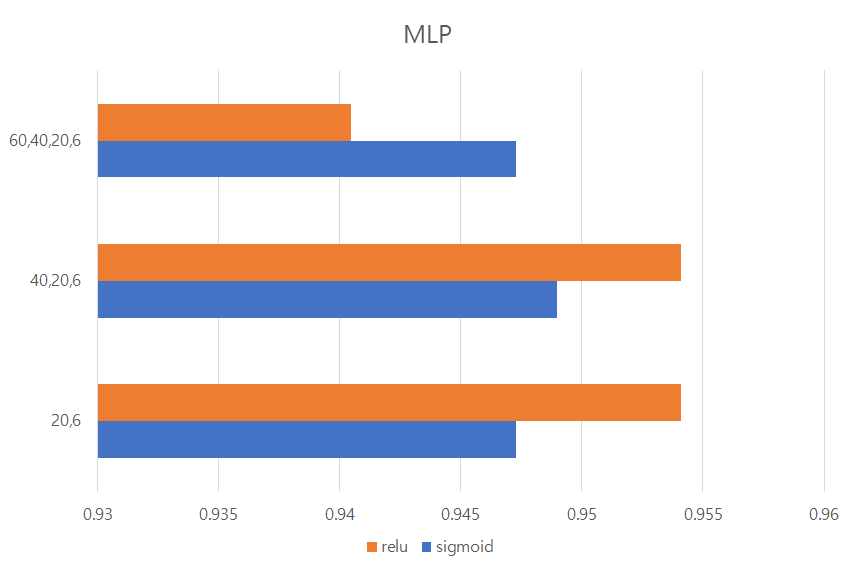

히든 레이어의 사이즈를 3가지로 달리하고, activation function을 sigmoid와 relu를 이용하여 실험해본 결과 precision은 위와 같이 나타났다. 수업시간에 배운대로 activation 함수의 특성 상 sigmoid는 0~1값으로 웨이트가 곱해지기 때문에 상위 레이어로 갈수록 학습률이 떨어지며, 그 대안이 relu activation function이 될 수 있다고 하신 말씀을 떠올려보았다. 이 데이터 셋 자체의 특성으로 역시나 성능은 아주 높게 측정이 되었으나, 히든 레이어 크기나 activation 함수에 따라서 어느정도 차이가 남을 볼 수 있다. 강의 시간 중 히든 레이어는 1개나 2개가 가장 적당하다고 하셨는데 위의 결과에서도 히든 레이어 수가 과하게 많아지니까 성능이 오히려 떨어짐을 알 수 있다. 이 역시 레이어 수가 너무 많아지고 hidden nodes의 개수가 많아짐에 따라 분류 시 학습 데이터에 overfitting되게 non-linear boundary가 생성될 수 있다는 것과 같은 맥락에서 이해하였다. 히든 레이어 크기에 따라서는 relu는 (20,6)으로 설정했을 때와 (40,20,6)으로 설정한 결과값이 같았고 sigmoid를 이용했을 때는 후자에서 조금 더 높음을 확인했다. 성능이 더 나았던 히든 레이어 크기에 대한 두가지 설정에서 relu는 sigmoid보다 좀 더 나은 결과를 보여주는데 이는 이전에 언급한 sigmoid의 주의점을 relu가 해결해주었기 때문이라고 생각하였다.

위의 실험 값을 바탕으로 relu를 activation function으로 하고 hidden layer size는 (20,6)으로 하는 모델에서 test 데이터를 이용하여 최종 성능 평가를 해보았다.

In [727]:
prediction_mlp_rt= MLP_r.predict(test_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_mlp_rt,test_onehot_y).ravel()
precision_mlp_rt = tp/(tp+fp)
precision_mlp_rt

0.9258278145695364

| data | validation set | test_set |
|:--------:|:--------:|:--------:|
| precision | 0.9540816326530612 | 0.9258278145695364 |

MLP에서 이 데이터 셋은 테스트 데이터로 검증을 해보았을 때, validation으로 평가했을 때보다 약 3%정도 낮은 성능을 보이며, 이는 우리가 학습 데이터, 벨리데이션 데이터, 테스트 데이터로 나누어 모델 설계를 실험한다는 점을 가만하면 충분히 가만할 수 있는 좋은 성능이라고 생각한다. 또 우리가 설계한 MLP모델이 트레이닝 데이터 셋에 대하여 크게 overfitting되었다고 할 수 없다고 판단했다.

### (5) KNN

In [729]:
from sklearn.neighbors import KNeighborsClassifier

In [730]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [731]:
KNN.fit(train_onehot_x, train_onehot_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [732]:
prediction_knn = KNN.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_knn,valid_onehot_y).ravel()
precision_knn = tp/(tp+fp)
precision_knn

0.9115646258503401

n_neighbors라는 parameter 값을 두가지 더 실험해보았다.

In [733]:
KNN2 = KNeighborsClassifier(n_neighbors=20)
KNN2.fit(train_onehot_x, train_onehot_y)
prediction_knn2 = KNN2.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_knn2,valid_onehot_y).ravel()
precision_knn2 = tp/(tp+fp)
precision_knn2

0.8214285714285714

In [734]:
KNN3 = KNeighborsClassifier(n_neighbors=10)
KNN3.fit(train_onehot_x, train_onehot_y)
prediction_knn3 = KNN3.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_knn3,valid_onehot_y).ravel()
precision_knn3 = tp/(tp+fp)
precision_knn3

0.8350340136054422

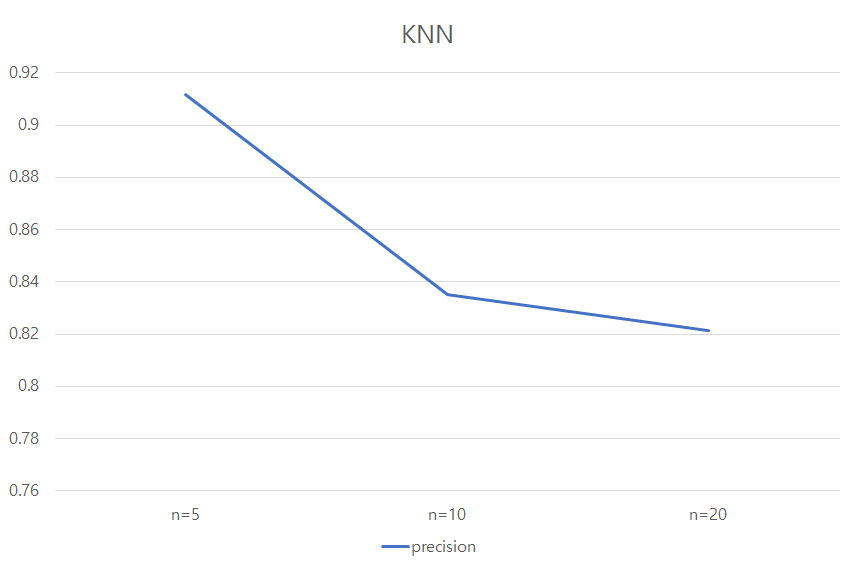

distance(거리) 값을 이용하여 classify하는 KNN 모델을 구현해보았는데, 몇 개의 이웃한 인스턴스를 보고 voting을 할 것인지를 결정하는 n_neighbors라는 parameter값을 세가지로 달리하여 실험하였다. instance 수가 수업 시간에 다룬 데이터 셋에 비해 상대적으로 크다고 판단해서 n_neighbors를 많이 증가시킬수록 성능이 올라갈 것이라고 판단했는데, 결과는 오히려 이 parameter 값이 증가할수록 precision이 하락하였다. 잘 생각해보니, 앞에서 이 데이터 셋은 매우 촘촘히 분포할 것이라고 예측을 하였는데, voting에 참여하는 인스턴스의 개수가 늘어날수록, 거리가 먼, 즉 상관이 없는 인스턴스가 개입이 될 확률이 높아진다는 것을 간과했던 것 같다.  

따라서 아래에는 parameter 값을 5로 둔 모델로 test 데이터로 평가를 진행하였다.

In [735]:
prediction_knnt = KNN.predict(test_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_knnt,test_onehot_y).ravel()
precision_knnt = tp/(tp+fp)
precision_knnt

0.8158940397350993

| data | validation set | test_set |
|:--------:|:--------:|:--------:|
| precision | 0.9115646258503401 | 0.8158940397350993 |

test set으로 평가해본 결과를 validation과 비교하니 약 3% 정도 성능이 떨어졌음을 확인할 수 있다. 이 역시 critical한 감소는 아니라고 생각하지만 앞서 실험해본 n_neighbors가 더 크게 주어진 모델과 비교했을 때가 test set과의 성능 차이가 더 적다는 점에서, 어느정도 거리가 있는 인스턴스를 사용함으로써 더 general해질 수 있을 수도 있다는 것을 알게되었다. 

### (6) SVM

In [737]:
from sklearn import svm

In [738]:
SVM = svm.SVC(kernel='linear')

In [739]:
SVM.fit(train_onehot_x, train_onehot_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [740]:
prediction_svm = SVM.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_svm,valid_onehot_y).ravel()
precision_svm = tp/(tp+fp)
precision_svm

0.9608843537414966

In [741]:
prediction_svmt = SVM.predict(test_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_svmt,test_onehot_y).ravel()
precision_svmt = tp/(tp+fp)
precision_svmt

0.9642384105960264

| data | validation set | test_set |
|:--------:|:--------:|:--------:|
| precision | 0.9608843537414966 | 0.9642384105960264 |

linear kernel로 Support Vector Machine 모델을 구현했을 때, validation set과 test set에서 모두 약 96%정도로 좋은 결과값을 보여준다. 또한 학습 과정 중 train set에 대해서 overfitting이 일어났다고 보기 힘들다.

### (7) Ensemble

    a. Bagging Classifier with DT

In [743]:
from sklearn.ensemble import BaggingClassifier

In [744]:
from sklearn import tree

In [747]:
bagg = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=5)

In [748]:
bagg.fit(train_onehot_x, train_onehot_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [749]:
prediction_bagg = bagg.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_bagg,valid_onehot_y).ravel()
precision_bagg = tp/(tp+fp)
precision_bagg

0.9608843537414966

DT를 사용하지만 estimator 수를 다르게 배정하여 다른 모델도 만들어보았다.

In [750]:
bagg2 = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=10)
bagg2.fit(train_onehot_x, train_onehot_y)
prediction_bagg2 = bagg2.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_bagg2,valid_onehot_y).ravel()
precision_bagg2 = tp/(tp+fp)
precision_bagg2

0.9455782312925171

In [751]:
bagg3 = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=20)
bagg3.fit(train_onehot_x, train_onehot_y)
prediction_bagg3 = bagg3.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_bagg3,valid_onehot_y).ravel()
precision_bagg3 = tp/(tp+fp)
precision_bagg3

0.9285714285714286

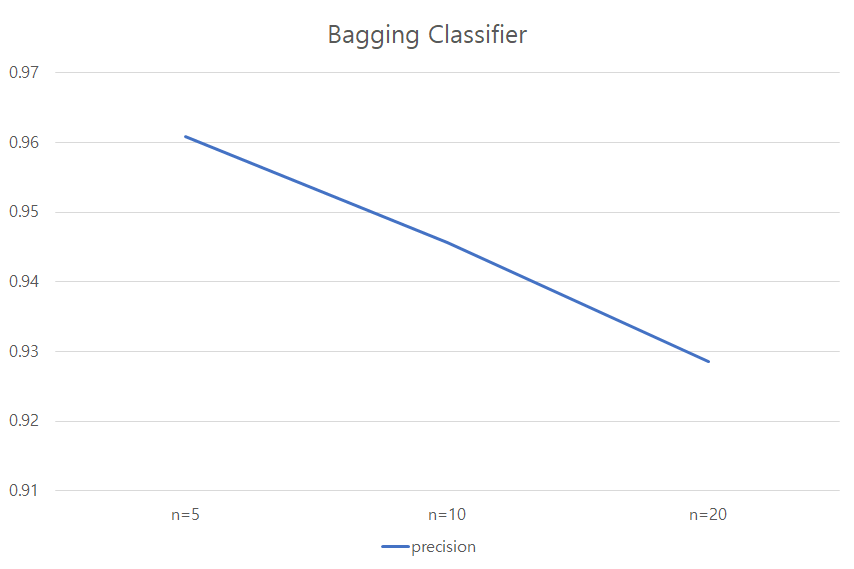

estimator의 수를 3가지 값으로 달리 주어서 모델을 실험해 보았다. 각 estimator는 DT로 했으며, 예상과는 다르게 estimator가 늘어날수록 precision이 하락했다. estimator가 많을수록 classification을 하는데 더 많은 도움을 무조건적으로 받을 것이라는 생각은 위험하다는 것을 알게되었다. 그리고 강의 시간에 각 estimator, 즉 committee 회원들이 서로 보완이 되어야한다는 내용을 접했는데, 그런 설정 없이 단지 estimator 수만 늘려서 각 estimator들끼리 작용이 효과적인지에 대해서 판단이 불가하다는 점이 매우 아쉽다. 결과적으로는, 실험 상 5개의 estimator들이 작용할 때 가장 높은 성능을 내었다.

위의 결과에 따라 estimator를 5개로 두고 test set에 대해서 평가를 진행하였다.

In [752]:
prediction_baggt = bagg.predict(test_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_baggt,test_onehot_y).ravel()
precision_baggt = tp/(tp+fp)
precision_baggt

0.9629139072847682

| data | validation set | test_set |
|:--------:|:--------:|:--------:|
| precision | 0.9608843537414966 | 0.9629139072847682 |

trainig data에 대해서 overfit이 심각하게 발생하고 있지 않다는 것을 확인할 수 있으며 validation set과 test set 모두에 대해서 96% 언저리의 좋은 성능을 보여주고 있다.

    b. Random Forest

분류 기준은 gini를 사용하였다.

In [755]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,bootstrap=False,criterion='gini')

In [756]:
rf = rf.fit(train_onehot_x, train_onehot_y)
prediction_rf = rf.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_rf,valid_onehot_y).ravel()
precision_rf = tp/(tp+fp)
precision_rf

0.9591836734693877

Random Forest에 대해서도 estimator의 개수를 달리해보았다.

In [757]:
rf2 = RandomForestClassifier(n_estimators=15,bootstrap=False,criterion='gini')
rf2 = rf2.fit(train_onehot_x, train_onehot_y)
prediction_rf2 = rf2.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_rf2,valid_onehot_y).ravel()
precision_rf2 = tp/(tp+fp)
precision_rf2

0.9608843537414966

In [766]:
rf3 = RandomForestClassifier(n_estimators=5,bootstrap=False,criterion='gini')
rf3 = rf3.fit(train_onehot_x, train_onehot_y)
prediction_rf3 = rf3.predict(valid_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_rf3,valid_onehot_y).ravel()
precision_rf3 = tp/(tp+fp)
precision_rf3

0.9455782312925171

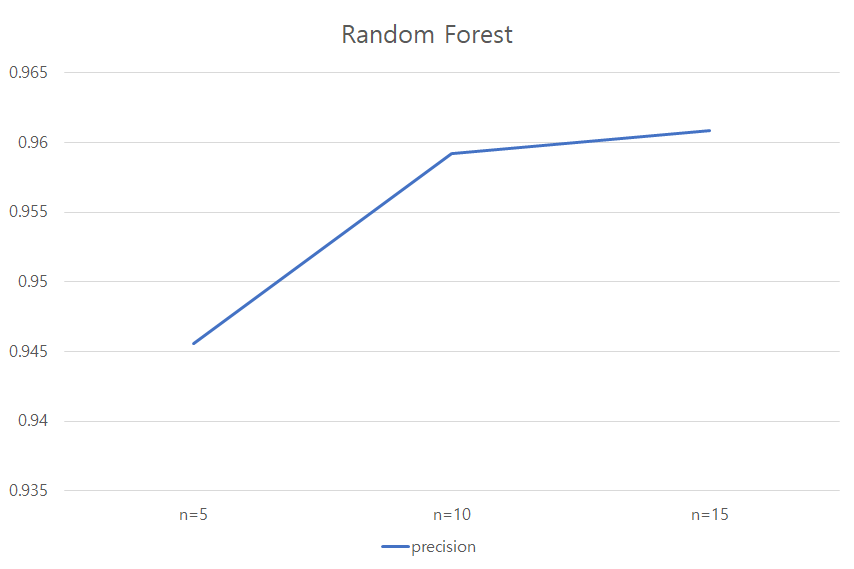

Random Forest에서는 estimator 개수를 5, 10, 15 이렇게 조금씩 늘려봤을 때, 그 수가 늘어남에 따라서 precision이 조금씩 개선되고 있음을 알 수 있다. 이 역시 각 estimator 사이의 보완 작용이 얼마나 잘 일어나고 있는지 시간상, 그리고 나의 학습량 상 정확히 알기 힘들지만 우연일지라도, 늘어나는 수의 estimator들이 잘 작용하고 있으리라 생각된다. 

따라서 estimator 수를 15로 한 모델로 test 셋에 대한 평가를 진행한다.

In [767]:
prediction_rf2t = rf2.predict(test_onehot_x)
tn, fp, fn, tp = confusion_matrix(prediction_rf2t,test_onehot_y).ravel()
precision_rf2t = tp/(tp+fp)
precision_rf2t

0.9589403973509933

| data | validation set | test_set |
|:--------:|:--------:|:--------:|
| precision | 0.9608843537414966 | 0.9589403973509933 |

test 데이터로 검증했을 때 성능이 아주 미비하게 약 0.2%정도 갑소했는데 이것으로 training set에 대허서 학습 시 크게 overfitting이 일어났다고 판단하기는 힘들다고 생각했고, 적절한 수준에서 학습이 잘 진행되었다고 판단하였다.

## Part1 정리

* 전처리 과정에서 missing value를 imputer로 채워준 후 22개의 original feature가 모두 categorical한 값을 가지기에 one hot econding을 통해서 각 feature들을 인코딩해주었다. 이 과정에서 각 feature value의 개수만큼 배로 feature space가 늘어났기에, 아마도 성능이 예상한 성능보다 훨씬 잘 나오지 않았을까 하는 생각을 하게 되었다.

* 데이터 셋의 크기가 매우 큰 건 아닌 것 같지만 작은지 적당한 정도인지 판단이 어려워 크로스 벨리데이션을 실험해보았다. 데이터의 분포 특성 상 이 값 역시 매우 완벽하게 나왔다고 판단했다.

* 성능 평가 기준 (metric)으로는 'Precison' (positive predictive value)를 채택하였다. 그 이유는 이 data set은 결국 버섯이 섭취 가능한지 아닌지를 classify하기에 모델을 통해 예측한 섭취 가능한 버섯들 중 실제로 얼만큼이 섭취 가능한지 잘 찾아내는 것이 이번 모델 설계의 핵심이라고 해석하였기 때문이다.

* 여러가지 classifier 알고리즘으로 모델을 구현해보고, 다양하게 parameter 값을 조정해본 후, 가장 성능이 좋은 설정 값대로 각 알고리즘 별 모델의 test data에 대한 성능 평가는 다음과 같이 나왔다.

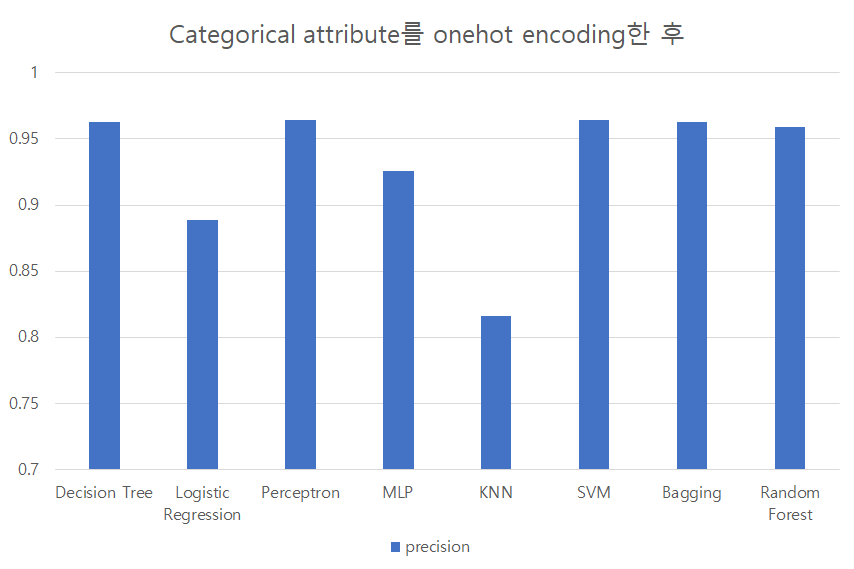

다음과 같이 categorical한 attribute를 onehot encoding으로 인코딩하여 feature space size가 크게 늘어난 후에, 모델을 구축한 결과는 Decision Tree, Perceptron, Ensemble에서 가장 좋게 성능이 평가되었다. 이 데이터 셋에 이 모델들이 가장 적합하다고는 할 수 없다. 왜냐하면 시간 상, 나의 지식 상, 그리고 실험을 진행하는 노트북의 성능 상 이 이상의 실험을 진행하기에는 무리였기 때문이고, 적절히 더 많은 parameter값을 조정해보지 못한 것 같아 이 점이 매우 아쉽게 느껴진다.
또 linear model과 nonlinear 모델 사이에 성능 차이도 크게 두드러지지 않아 데이터 셋의 분포에 대해서도 예측하기가 어렵지만, 두 모델 사이에 큰 차이가 없다는 점에서 이 데이터 셋은 아마 linearly separable하지 않을까 조심스럽게 생각해본다.
Part1의 실험을 통해서 설계해본 classifier 모델 중 test set에 대해서 가장 높은 성능을 보여준 모델은 DT와 Perceptron이었으며 이들의 최종 성능은 0.964238411로 약 96%의 precision을 기록했다.

---

## Part2

위의 파트에서 실험의 용이를 위해 데이터를 numpy 배열로 바꿔주었기에 다시 onehot encoding을 해서 feature selection을 진행해보겠다.
feature selection은 아주 직관적으로 진행하였다.

In [938]:
path = "C:\\Users\\chae\\Downloads\\mushroom.csv"

In [939]:
newdata = pd.read_csv(path)

In [940]:
newdata.describe()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


missing value 처리과정에서의 오차를 줄이기 위해서 stalk-root feature를 drop하기로 하고 여러 자료를 찾아본 결과, 실제로 버섯의 섭취 가능 여부(독 여부)와 줄기, 뿌리의 상관관계보다는 다른 attribure(색깔, cap의 생김새)와의 연관성이 훨씬 크다고 판단하게 되어 drop을 실행하였다. 

In [941]:
newdata = newdata.drop(columns='stalk-root')

또한 추가적인 자료 조사를 통해, 이 데이터 셋에서 대상으로하는 버섯과의 독성 여부는 주로 cap의 생김새에 의해서 어느정도 구분이 가능하며, population과 habitat은 어디서 채취를 하느냐, 환경이 일시적으로 또는 장기적으로 fungi가 자라기에 적절한지에 따라 매우 상이함으로 고려하여 판단하기가 어렵다는 자료등을 고려하여 population과 habitat을 포함한 많은 feature들을 삭제하고 cap, odor, veil, spore-print-color만을 남겨두었다.

In [942]:
newdata = newdata.drop(columns=['bruises','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','ring-number','ring-type','population', 'habitat'])

In [943]:
newdata.describe()

,Class,cap-shape,cap-surface,cap-color,odor,veil-type,veil-color,spore-print-color
count,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,9,1,4,9
top,e,x,y,n,n,p,w,w
freq,4208,3656,3244,2284,3528,8124,7924,2388


이렇게 세가지의 feature를 drop한 후, 인코딩을 하였고, feature space가 여전히 인코딩을 통해 늘어나지만 part1보다는 줄어듬을 알 수 있다.

## >> 여기서부터 인코딩 문제에서 에러가 해결되지 않에 feature selection을 거친 데이터에 대한 성능 평가는 마크다운으로 적어보았습니다

ohe = OneHotEncoder()
data_x = newdata.drop(columns=['Class'])
ohe.fit(data_x)
data_onehot = ohe.transform(data_x)
data_onehot = data_onehot.toarray()
data_onehot = data_onehot.shape[1]
df = pd.DataFrame(data_onehot=data_onehot)
data_onehot=pd.concat((data['Class'],df),axis=1)
data_onehot
data_onehot = data_onehot.values
data_onehot

newdata = pd.concat((newdata.drop(columns = ['Class','cap-shape','cap-surface','cap-color','odor','veil-type','veil-color','spore-print-color']),Class_df, cap_shape_df,cap_surface_df,cap_color_df,odor_df,veil_type_df,veil_color_df,spore_print_color_df),axis=1)

In [893]:
newdata

,Class_e,Class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,veil-color_y,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 데이터 나누기

In [894]:
newtrain = newdata.sample(frac=0.6)
remain = newdata.drop(index = newtrain.index)
newvalid = remain.sample(frac=0.5)
newtest = remain.drop(index = newvalid.index)

In [898]:
newtrain_x = newtrain.drop(columns = ['Class_e','Class_p'])
newtrain_y = newtrain[['Class_e','Class_p']]
newtrain_y = newtrain_y.values
newvalid_x = newvalid.drop(columns = ['Class_e','Class_p'])
newvalid_y = newvalid[['Class_e','Class_p']]
newvalid_y = newvalid_y.values
newtest_x = newtest.drop(columns = ['Class_e','Class_p'])
newtest_y = newtest[['Class_e','Class_p']]
newtest_y = newtest_y.values

데이터 준비 완료!

---

## Part3: 이 부분 역시 전 파트의 인코딩 문제로 마크다운 처리했습니다

이번 파트에서는 새롭게 feature selection과 encoding을 거친 데이터로 part1에서 좋은 성능을 기록했던 DT, Perceptron, MLP, RandomForest에 대해서 test 데이터에 대한 성능 변화를 살펴보겠다.

(1) Decision Tree
dt_entropy2.fit(newtrain_x, newtrain_y)
prediction2n = dt_entropy2.predict(newtest_x)
tn, fp, fn, tp = confusion_matrix(prediction2n,newtest_y).ravel()
precision2n = tp/(tp+fp) #0.9608843537414966와 비교

(2) Perceptron
P.fit(newtrain_x, newtrain_y
prediction_p2 = P.predict(newtest_x)
tn, fp, fn, tp = confusion_matrix(prediction_p2,newtest_y).ravel()
precision_p2 = tp/(tp+fp)
precision_p2 #0.9642384105960264

(3) MLP
MLP_r.fit(newtrain_x,newtrain_y)  
prediction_mlp_rtw= MLP_r.predict(newtest_x)
tn, fp, fn, tp = confusion_matrix(prediction_mlp_rtw,newtest_y).ravel()
precision_mlp_rt2 = tp/(tp+fp)
precision_mlp_rt2 #0.9258278145695364

(4) Random Forest
rf2 = rf2.fit(newtrain_x, newtrain_y)     
prediction_rf2t2 = rf2.predict(newtest_x)
tn, fp, fn, tp = confusion_matrix(prediction_rf2t2,newtest_y).ravel()
precision_rf2t2 = tp/(tp+fp)
precision_rf2t2 #0.9589403973509933

인코딩이 성공적으로 되었다면 feature selection의 효과를 볼 수 있었을텐데 너무 아쉽다.

## Part4

### 이번 파트에서는 새롭게 인코딩한 데이터를 numpy배열을 쓰지 않고 배열로 변환하여 딥러닝 keras를 통해서 MLP를 구현해보려고 했으나 역시 이전 파트의 문제로 마크다운 처리합니다. 위에 sklearn에 따라서 MLP를 구현한 것을 참고해주세요.

import keras

from keras.models import Sequential

nn_model = Sequential()

from keras.layers import InputLayer,Dense

nn_model.add(InputLayer(input_shape=((43,))))

nn_model.add(Dense(units=43, activation='sigmoid'))

nn_model.add(Dense(units=30
                   , activation='sigmoid'))

nn_model.add(Dense(units=10, activation='sigmoid'))

nn_model.add(Dense(units=1, activation='sigmoid'))

nn_model.compile(optimizer='sgd', loss = 'mean_squared_error', metrics=['accuracy'])

nn_model.fit(x=newtrain_x, y=newtrain_y, epochs=1000, validation_data = (newvalid_x, newvalid_y))

In [847]:
# nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 43)                1892      
_________________________________________________________________
dense_64 (Dense)             (None, 30)                1320      
_________________________________________________________________
dense_65 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 11        
Total params: 3,533
Trainable params: 3,533
Non-trainable params: 0
_________________________________________________________________


nn_model.evaluate(x=newtest_x, y=newtest_y)  
cf. keras 새로운 버전에서는 precision을 metric으로 제공하지 않는다!!

원래는 epoch수도 달리해보고 여러 히든 레이어를 디자인해보려고 시도했습니다

## Part5

*실험 정리 및 결론

-모델에 대한 자세한 결론은 part1을 참고해주십시오.

이번 데이터 셋에서는 feature selection은 실패하였고, 그 이전의 인코딩을 통한 8가지의 다른 classification 모델을 설계해보았다. 설계 과정에서 각 알고리즘마다 parameter를 달리하여 overfitting의 관점과 원래 내가 예상하고 있던 model의 개선 방향이 항상 일치하지 않음을 알게 되었다. 또한 part1에서 시도해본 여러가지 모델 중 linear model과 nonlinear model간의 성능이 크게 차이 나지 않아 데이터 셋의 분포에 대한 예측을 단지 linearly separable할 것이라고 예측해버린 것이 조금 아쉽다. 시간적 여유와 파이썬에 대해 더 알았다면 정말 좋았을 것 같다. 기회가 된다면 AI 수업을 통해서 다시 한번 기계학습 알고리즘에 접근해보고 싶다. 

## 참고 자료

https://hashcode.co.kr/questions/1772/%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4-%EB%AC%B8%EB%B2%95-%EC%9E%91%EC%84%B1-%ED%8C%81  마크다운 관련 정리 자료

https://en.wikipedia.org/wiki/Precision_and_recall evaluation metric Precision 정의

2018 가을학기 기계학습 강의 자료